# **Text Emotion Classification using LSTM**

## **Main References:**
* https://notebooks.quantumstat.com/#/
* https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/TF_emotion_detection.ipynb
* https://en.wikipedia.org/wiki/Emotion_classification
* https://en.wikipedia.org/wiki/Long_short-term_memory

**Emotion classification:** It is the means by which one may distinguish or contrast one emotion from another, is a contested issue in emotion research and in affective science.

**Long short-term memory (LSTM):** 
* It is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. 
* Unlike standard feedforward neural networks, LSTM has feedback connections. 
* It can process not only single data points (such as images), but also entire sequences of data (such as speech or video). 
* For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems).

**Structure:**
* A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. 
* The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.


LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models and other sequence learning methods in numerous applications.



In [1]:
!nvidia-smi

Sat Oct 30 04:03:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Installing TensorBoard**

In [2]:
!pip install tensorboard

## **Downloading Glove word embeddings**
Using glove.6B it to create the embedding layer

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-10-29 22:07:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-10-29 22:07:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-10-29 22:07:05--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
##Unzipping the glove vectors for creating embedding
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!ls

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data


In [ ]:
!rm -rf glove.6B.50d.txt
!rm -rf glove.6B.200d.txt
!rm -rf glove.6B.300d.txt

In [ ]:
!ls

glove.6B.100d.txt  glove.6B.zip  sample_data


*Using 100d gloVe vectors*

## **Downloading the dataset for emotion classification**

In [ ]:
!wget https://www.dropbox.com/s/607ptdakxuh5i4s/merged_training.pkl

--2021-10-29 22:10:54--  https://www.dropbox.com/s/607ptdakxuh5i4s/merged_training.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/607ptdakxuh5i4s/merged_training.pkl [following]
--2021-10-29 22:10:54--  https://www.dropbox.com/s/raw/607ptdakxuh5i4s/merged_training.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8c36d1e21db9b737d5b420f682.dl.dropboxusercontent.com/cd/0/inline/BY9Qw3vHO8cXOrIdVNJ-En2Yo_K613nafUsP04O6zuVGMWskHLdk3K7FYt3RnxyJlQGQwouBlMC5Lx7MecyKaCNN1SVlll5_jllNvUUC38BTa_dvRrsdprHvFWEXd6qbPUV6FpeUQuWgKW1F_FX7St_v/file# [following]
--2021-10-29 22:10:54--  https://uc8c36d1e21db9b737d5b420f682.dl.dropboxusercontent.com/cd/0/inline/BY9Qw3vHO8cXOrIdVNJ-En2Yo_K613nafUsP04O6zuVGMWskHLdk3K7FYt3RnxyJlQGQw

In [ ]:
import pickle

def load_from_pickle(directory):
    return pickle.load(open(directory,"rb"))

In [ ]:
data = load_from_pickle(directory="merged_training.pkl")

## using a sample
emotions = [ "sadness", "joy", "love", "anger", "fear", "surprise"]
data= data[data["emotions"].isin(emotions)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416809 entries, 27383 to 64703
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      416809 non-null  object
 1   emotions  416809 non-null  object
dtypes: object(2)
memory usage: 9.5+ MB


In [ ]:
data.describe()

,text,emotions
count,416809,416809
unique,393822,6
top,i feel more adventurous willing to take risks,joy
freq,16,141067


**Checking for NULLs**

In [ ]:
data.isna().sum()

text        0
emotions    0
dtype: int64

In [ ]:
data.isnull().sum()

text        0
emotions    0
dtype: int64

In [ ]:
data.head(20)

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
18231,i find myself frustrated with christians becau...,love
10714,i am one of those people who feels like going ...,joy
35177,i feel especially pleased about this as this h...,joy
122177,i was struggling with these awful feelings and...,joy
26723,i feel so enraged but helpless at the same time,anger


In [ ]:
data['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

**Checking whether data is balanced**

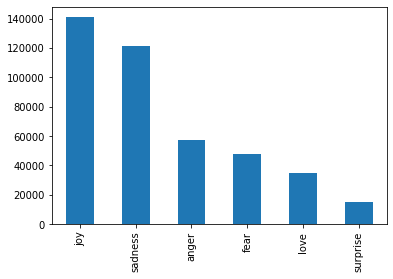

In [ ]:
data.emotions.value_counts().plot.bar()

In [ ]:
MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 170 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)

train = data

#labels = emotions
y = train['emotions'].values
comments_train = train['text']
comments_train = list(comments_train)

In [ ]:
len(comments_train)

416809

In [ ]:
max_text = (max(comments_train, key=len))

In [ ]:
len(max_text.split())

178

In [ ]:
def num_words(sentence):
  words = sentence.split()
  return len(words)

In [ ]:
total_avg_words = sum( map(num_words, comments_train) ) / len(comments_train)
total_avg_words

19.211015117235952

In [ ]:
MAX_SEQUENCE_LENGTH = 50

## **Text pre-proccessing for remove stopwords and clean the data**

In [ ]:
import re
from tqdm import tqdm_notebook

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text, remove_stopwords = True):
    output = ""
    text = str(text).replace("\n", "")
    text = re.sub(r'[^\w\s]','',text).lower()
    if remove_stopwords:
        text = text.split(" ")
        for word in text:
            if word not in stopwords.words("english"):
                output = output + " " + word
    else:
        output = text
    return str(output.strip())[1:-3].replace("  ", " ")

In [ ]:
texts = []

for line in tqdm_notebook(comments_train, total=159571): 
    texts.append(clean_text(line))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/159571 [00:00<?, ?it/s]

In [ ]:
print('Sample data:', texts[1], y[1])

Sample data: m alone feel aw sadness


## **Tokenizing the texts**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 86474


In [ ]:
import json
with open('word_index.json', 'w') as f:
    json.dump(word_index, f)
with open('index_word.json', 'w') as f2:
    json.dump(tokenizer.index_word, f2)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

Shape of data tensor: (416809, 50)
Shape of label tensor: (416809,)


In [ ]:
import numpy as np

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

In [ ]:
data[25]

array([ 2791,  3782,  6295,   955,    46,  2153, 12282,    17,  1100,
          10,    14,     4,   475,   911,  1100,    12,   415,    62,
         273,  1364,    25,     2,   454, 18549,  1063,    63,  5393,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)

**We can see in the above output that the text is tuned into tokens**

In [ ]:
labels[25]

'joy'

## **One-hot encoding labels for the text**

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(labels)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [ ]:
lb.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [ ]:
labels = lb.transform(labels)

In [ ]:
labels[25]

array([0, 0, 1, 0, 0, 0])

**We can see that the labels are now one hot encoded**

In [ ]:
num_validation_samples = int(VALIDATION_SPLIT*data.shape[0])
x_train = data[: -num_validation_samples]
y_train = labels[: -num_validation_samples]
x_val = data[-num_validation_samples: ]
y_val = labels[-num_validation_samples: ]
print('Number of entries in each category:')
print('training: ', y_train.sum(axis=0))
print('validation: ', y_val.sum(axis=0))

Number of entries in each category:
training:  [ 45907  38252 112865  27639  96882  11903]
validation:  [11410  9460 28202  6915 24305  3069]


Checking for the validation and train data shapes after splitting

In [ ]:
x_train.shape

(333448, 50)

In [ ]:
y_train.shape

(333448, 6)

In [ ]:
x_val.shape

(83361, 50)

In [ ]:
y_val.shape

(83361, 6)

## **Creating the test set**

In [ ]:
x_val = x_val[: -40000]
y_val = y_val[: -40000]
x_test = x_val[-40000: ]
y_test = y_val[-40000: ]

In [ ]:
print('Tokenized sentences: \n', data[10])
print('One hot label: \n', labels[10])

Tokenized sentences: 
 [1904   24    3    4   14   82  152 2617 1567 5390  587  322   88 2304
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
One hot label: 
 [0 0 1 0 0 0]


Above is a sample for vectorized text and one hot encoded labels.

## **Creating the embedding matrix for the model**

In [ ]:
embeddings_index = {}
f = open('/content/glove.6B.100d.txt')
print('Loading GloVe from:', '/content/glove.6B.100d.txt','...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: /content/glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [ ]:
embedding_matrix.shape

(86475, 100)

We have chosen 100d Glove vectors and converted them into gloVe embeddings

## **Create the model**

In [ ]:
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
##Creating an embedding layer
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = MAX_SEQUENCE_LENGTH,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)
##Adding LSTM
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(6, activation="softmax")(x)

In [ ]:
model = Model(sequence_input, preds)
model.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

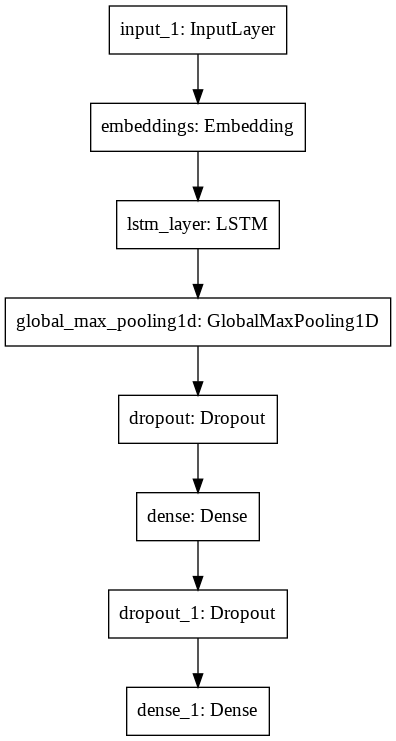

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

## **Model Finetuning**

In [ ]:
##Train model for 5 epochs
history = model.fit(x_train, y_train, epochs = 5, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/5
2606/2606 [==============================] - 19s 5ms/step - loss: 0.5960 - accuracy: 0.7777 - val_loss: 0.2465 - val_accuracy: 0.8978
Epoch 2/5
2606/2606 [==============================] - 14s 5ms/step - loss: 0.2358 - accuracy: 0.9035 - val_loss: 0.1743 - val_accuracy: 0.9175
Epoch 3/5
2606/2606 [==============================] - 14s 5ms/step - loss: 0.1790 - accuracy: 0.9173 - val_loss: 0.1512 - val_accuracy: 0.9215
Epoch 4/5
2606/2606 [==============================] - 14s 5ms/step - loss: 0.1540 - accuracy: 0.9233 - val_loss: 0.1391 - val_accuracy: 0.9243
Epoch 5/5
2606/2606 [==============================] - 14s 5ms/step - loss: 0.1418 - accuracy: 0.9255 - val_loss: 0.1325 - val_accuracy: 0.9254


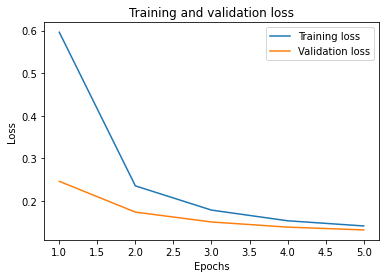

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

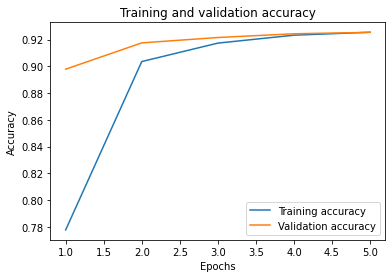

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

In [ ]:
print("Accuracy in the test set:")
model.evaluate(x_test, y_test)[1]

Accuracy in the test set:
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1318 - accuracy: 0.9253


0.9252750277519226

## **Testing the model**

In [ ]:
samples = ['i feel like, i do not know...', 'love you woman', 'that is so funny', 'mamma, i just killed a man', 'i want to ride my bicycle', 'im alone i feel awful', 'i beleive that i am much more sensitive to oth...']

In [ ]:
cleaned_samples = []
for sentence in samples:
  print(sentence)
  cleaned = clean_text(sentence)
  print(cleaned)
  cleaned_samples.append(cleaned)

i feel like, i do not know...
eel like k
love you woman
ove wo
that is so funny
u
mamma, i just killed a man
amma killed 
i want to ride my bicycle
ant ride bicy
im alone i feel awful
m alone feel aw
i beleive that i am much more sensitive to oth...
eleive much sensitive 


In [ ]:
tokenized_seq = tokenizer.texts_to_sequences(cleaned_samples)
padded_seq =  pad_sequences(tokenized_seq, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)

In [ ]:
int2label = {
    0: 'anger',
    1: 'fear',
    2: 'joy',
    3: 'love',
    4: 'sadness',
    5: 'surprise'
}

In [ ]:
predictions = model.predict(padded_seq)

In [ ]:
for i, prediction in enumerate(predictions):
  print(samples[i] +" : " +int2label[(np.argmax(prediction))])

i feel like, i do not know... : joy
love you woman : joy
that is so funny : anger
mamma, i just killed a man : fear
i want to ride my bicycle : anger
im alone i feel awful : sadness
i beleive that i am much more sensitive to oth... : fear


In [ ]:
pred = int2label[(np.argmax(prediction))]

In [ ]:
pred

'fear'

In [ ]:
model.save('model.h5')

## **Gradio**

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 2.0 MB 9.9 MB/s 
     |████████████████████████████████| 1.9 MB 48.0 MB/s 
     |████████████████████████████████| 206 kB 76.4 MB/s 
     |████████████████████████████████| 63 kB 2.9 MB/s 
     |████████████████████████████████| 961 kB 79.1 MB/s 
     |████████████████████████████████| 3.5 MB 49.2 MB/s 


In [ ]:
import tensorflow as tf
import numpy as np
# from urllib.request import urlretrieve
import gradio as gr

def emotion_classification(sentence):
    cleaned = clean_text(sentence)
    cleaned_samples.append(cleaned)
    tokenized_seq = tokenizer.texts_to_sequences(cleaned_samples)
    padded_seq =  pad_sequences(tokenized_seq, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
    predictions = model.predict(padded_seq)
    pred = int2label[(np.argmax(prediction))]
    return pred

output_component = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=emotion_classification, 
             inputs="textbox", 
             outputs='textbox').launch(share=True);

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://30868.gradio.app
